In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

import tensorflow as tf
from skimage.transform import radon, iradon
from scipy import ndimage
from tensorflow.keras.optimizers import Adam

print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.1.0


In [0]:
#import data
labels_df = pd.read_csv('./ctlabels.csv')
labels = np.array(labels_df[' hemorrhage'].tolist())

files = sorted(glob.glob('./head_ct/head_ct/*.png'))
images = np.array([cv2.imread(path) for path in files])

(200, 256, 256, 3)


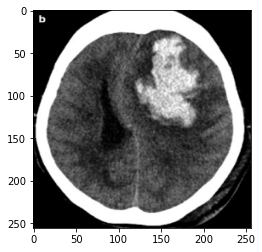

In [0]:
# resize all images to same size (256x256)
images = np.array([cv2.resize(images,(256,256)) for images in images])
print(images.shape)

# convert rgb to gray
gray_images = np.zeros((200, 256, 256))
def rgb2gray(img):
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
for i in range(images.shape[0]):
    gray_images[i, ...] = rgb2gray(images[i, ...]) 
plt.imshow(gray_images[0], cmap="gray")

Text(0.5, 1.0, 'Reconstructed image')

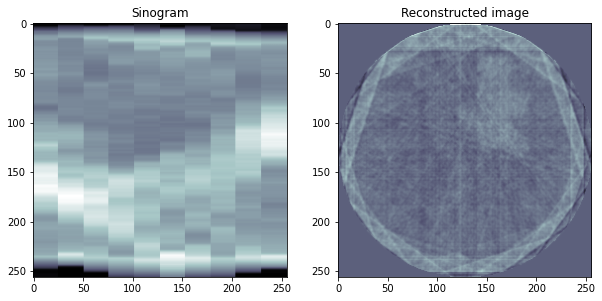

In [0]:
# Convert head CT scans to sinogram with different projection number
proj_num = 10
rad = radon(gray_images[0], theta=np.arange(0, 180, 180/proj_num), preserve_range=True)
x_reshape_radon = np.ones((256,256))

for num in range(proj_num):
    begin = int(num * 256/proj_num)
    end = int(256/proj_num*(num+1))
    for col in range(begin, end,1):
        x_reshape_radon[:,col] = rad[:,num]

back_rad, indices = np.unique(x_reshape_radon, axis=1, return_index=True)
back_rad = x_reshape_radon[:,np.sort(indices)]

f = plt.figure(figsize = (10,5))
f.add_subplot(121)
plt.imshow(x_reshape_radon, cmap = 'bone')
plt.title('Sinogram')

f.add_subplot(122)
plt.imshow(iradon(rad), cmap = 'bone')
plt.title('Reconstructed image')

In [0]:
#rotation angle in degree and save them into new folder
proj_num = 90
for index in range(200):
    for angle in range(0, 360, 30):
        rotated = ndimage.rotate(gray_images[index], angle)
        rotated = cv2.resize(rotated, (256,256))
        x_radon = radon(rotated, theta=np.arange(0, 180, 180/proj_num), preserve_range=True)
        x_reshape_radon = np.ones((256,256))
        for num in range(proj_num):
            begin = int(num * 256/proj_num)
            end = int(256/proj_num*(num+1))
            for col in range(begin, end,1):
                x_reshape_radon[:,col] = x_radon[:,num]

        np.save("./newdata/sinogram_256_90/{}_{}".format(index, angle), x_reshape_radon)


In [0]:
# Load all the sinogram into one array
x_all = np.ones((2400, 256, 256), dtype=np.int32)
count = 0
for index in range(200):
    for angle in range(0, 360, 30):
        print("------ Loading file #{} ------".format(index))
        temp = np.load("./newdata/sinogram_256_90/{}_{}.npy".format(index, angle))
        x_all[count, :, :] = temp
        count += 1
np.save("./newdata/sinogram_256_90/all90", x_all)

------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #0 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #1 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loading file #2 ------
------ Loa

------ Loading file #24 ------
------ Loading file #24 ------
------ Loading file #24 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #25 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #26 ------
------ Loading file #27 ------
------ Loading file #27 ------
------ Loading file #27 ------
------ Loading file #27 ------
------ Loading file #27 ------
------ L

------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #49 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #50 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ Loading file #51 ------
------ L

------ Loading file #74 ------
------ Loading file #74 ------
------ Loading file #74 ------
------ Loading file #74 ------
------ Loading file #74 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #75 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #76 ------
------ Loading file #77 ------
------ Loading file #77 ------
------ Loading file #77 ------
------ L

------ Loading file #99 ------
------ Loading file #99 ------
------ Loading file #99 ------
------ Loading file #99 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #100 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #101 ------
------ Loading file #102 ------
------ Loading file #102 ------
------ Loading file #102 ------
------ Loadi

------ Loading file #123 ------
------ Loading file #123 ------
------ Loading file #123 ------
------ Loading file #123 ------
------ Loading file #123 ------
------ Loading file #123 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #124 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #125 ------
------ Loading file #126 ------
------ L

------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #148 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #149 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ Loading file #150 ------
------ L

------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #173 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #174 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ Loading file #175 ------
------ L

------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #198 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------
------ Loading file #199 ------


In [0]:
#expand labels according to images augmentation
labels_aug = []
for i in range(len(labels)):
    for j in range(12):
        labels_aug.append(labels[i])
y_all = np.array(labels_aug)
print(y_all.shape)

(2400,)
